In [20]:
import pandas as pd 
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [21]:
state_abbrevs = {"Alabama":"AL", "Alaska":"AK", "Arizona":"AZ", "Arkansas":"AR", "California":"CA", "Colorado":"CO", 
                 "Connecticut":"CT", "Delaware":"DE", "Florida":"FL", "Georgia":"GA", "Hawaii":"HI", "Idaho":"ID", 
                 "Illinois":"IL", "Indiana":"IN", "Iowa":"IA", "Kansas":"KS", "Kentucky":"KY", "Louisiana":"LA", 
                 "Maine":"ME", "Maryland":"MD", "Massachusetts":"MA", "Michigan":"MI", "Minnesota":"MN", 
                 "Mississippi":"MS", "Missouri":"MO", "Montana":"MT", "Nebraska":"NE", "Nevada":"NV", 
                 "New Hampshire":"NH", "New Jersey":"NJ", "New Mexico":"NM", "New York":"NY", "North Carolina":"NC", 
                 "North Dakota":"ND", "Ohio":"OH", "Oklahoma":"OK", "Oregon":"OR", "Pennsylvania":"PA", 
                 "Rhode Island":"RI", "South Carolina":"SC", "South Dakota":"SD", "Tennessee":"TN", "Texas":"TX", 
                 "Utah":"UT", "Vermont":"VT", "Virginia":"VA", "Washington":"WA", "West Virginia":"WV", 
                 "Wisconsin":"WI", "Wyoming":"WY", "District of Columbia":"DC", "Puerto Rico":"PR", 
                 "American Samoa":"AS"}

In [22]:
#https://covidtracking.com/api
stats = pd.read_csv("data/covid-statistics-by-us-states-daily-updates.csv")
stats=stats.replace(to_replace={state_abbrevs[x]:x for x in state_abbrevs})
#replace NaNs with zeros in the df
stats=stats.fillna(0)
stats.date = pd.to_datetime(stats.date, format="%Y%m%d")

In [23]:
stats = stats[["date", "state", "positive", "hospitalized", "inIcuCumulative", "onVentilatorCumulative", "death"]]

In [24]:
stats

,date,state,positive,hospitalized,inIcuCumulative,onVentilatorCumulative,death
0,2020-04-10,Alaska,246.0,28.0,0.0,0.0,7.0
1,2020-04-10,Alabama,2968.0,368.0,0.0,0.0,80.0
2,2020-04-10,Arkansas,1171.0,130.0,43.0,39.0,23.0
3,2020-04-10,American Samoa,0.0,0.0,0.0,0.0,0.0
4,2020-04-10,Arizona,3112.0,0.0,0.0,0.0,97.0
...,...,...,...,...,...,...,...
1995,2020-03-02,Washington,34.0,0.0,0.0,0.0,11.0
1996,2020-03-01,Rhode Island,1.0,0.0,0.0,0.0,0.0
1997,2020-03-01,Washington,30.0,0.0,0.0,0.0,8.0
1998,2020-02-29,Washington,18.0,0.0,0.0,0.0,5.0


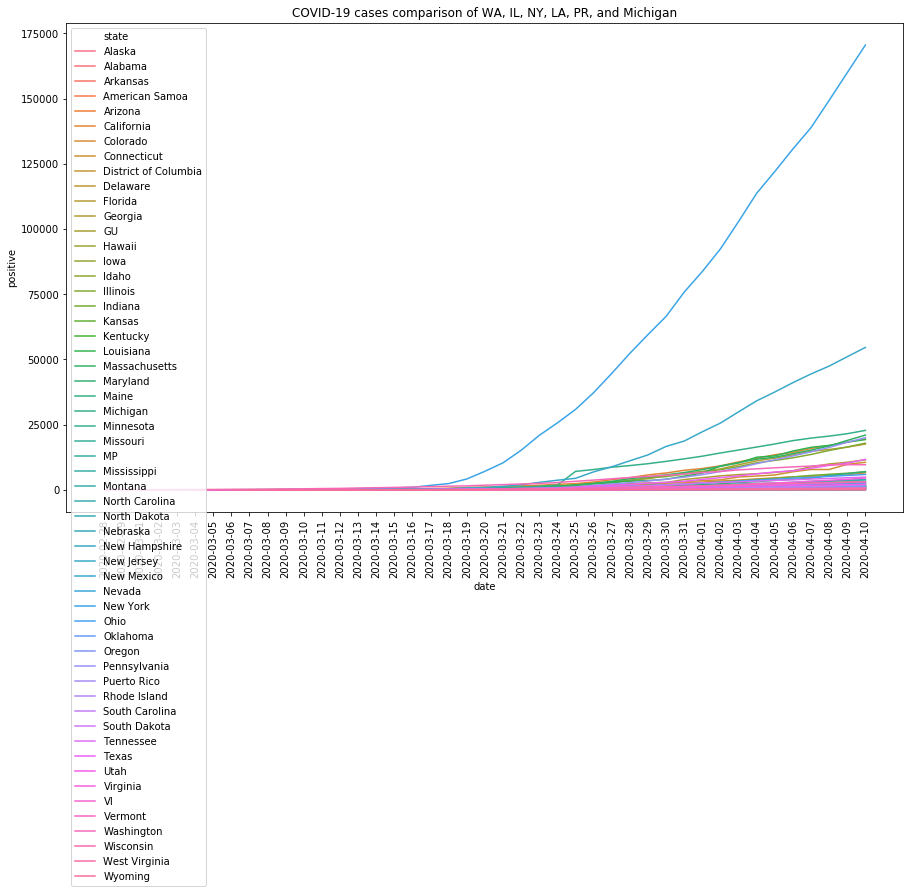

In [25]:
plt.figure(figsize=(15,9))
plt.title('COVID-19 cases comparison of WA, IL, NY, LA, PR, and Michigan') # Title
sns.lineplot(x="date", y="positive", hue="state",data=stats)
plt.xticks(stats.date.unique(), rotation=90) # All values in the x axis rotate 90 degrees
plt.show()

https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2017_county_data.csv

In [26]:
acs_census = pd.read_csv("data/acs2017_county_data.csv")

In [27]:
acs_census

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


In [28]:
# https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
covid_by_county = pd.read_csv("data/covid-us-counties.csv")

In [10]:
covid_by_county

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
51164,2020-04-11,Sublette,Wyoming,56035.0,1,0
51165,2020-04-11,Sweetwater,Wyoming,56037.0,7,0
51166,2020-04-11,Teton,Wyoming,56039.0,53,0
51167,2020-04-11,Uinta,Wyoming,56041.0,4,0
